In [1]:
import logging

from datetime import datetime

from electricity_demand_fc.utils.data_retrieval import (
    get_raster_points_inside_nl,
    get_gfs_data,
    extract_gfs_data,
    get_demand_entsoe
)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
log = logging.getLogger(__name__)

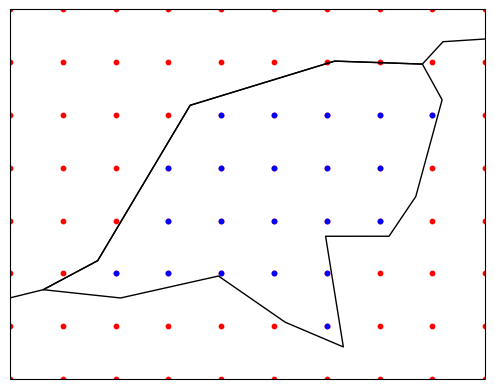

,geometry
18,POINT (4.00000 51.50000)
26,POINT (4.50000 51.50000)
27,POINT (4.50000 52.00000)
28,POINT (4.50000 52.50000)
34,POINT (5.00000 51.50000)
35,POINT (5.00000 52.00000)
36,POINT (5.00000 52.50000)
37,POINT (5.00000 53.00000)
42,POINT (5.50000 51.50000)
43,POINT (5.50000 52.00000)


In [2]:
points = get_raster_points_inside_nl(plot=True, raster_size=0.5)
points

In [3]:
start_date = datetime(year=2023, month=1, day=1)
end_date = datetime(year=2023, month=1, day=2)
dataset = get_gfs_data(start_date, end_date)
dataset

2023-08-21 22:49:08,474 - INFO - 🧵 Working on 8 tasks with 8 threads.


✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 06:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


2023-08-21 22:49:15,196 - INFO - Number of Herbie objects: 8


✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 12:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 18:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [data/gfs/20230101]


<xarray.Dataset>
Dimensions:              (time: 4, step: 2, latitude: 361, longitude: 720)
Coordinates:
  * time                 (time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:0...
  * step                 (step) timedelta64[ns] 00:00:00 03:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           (step, time) datetime64[ns] 2023-01-01 ... 2023-01-0...
Data variables:
    t2m                  (step, time, latitude, longitude) float32 243.2 ... ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   gfs
    product:                 pgrb2.0p50
    description:             Global Forecast System
    searchString:            :TMP:2 m above ground

In [4]:
df_X = extract_gfs_data(points=points, dataset=dataset, variable="t2m", start_date=start_date, end_date=end_date)
df_X

51.5                    52.0        52.5  \
                            4.0         4.5         4.5         4.5   
2023-01-01 00:00:00  287.258057  287.938049  287.638062  284.168060   
2023-01-01 03:00:00  285.400848  286.230865  285.530853  283.310852   
2023-01-01 06:00:00  285.552032  286.162018  285.942017  282.952026   
2023-01-01 09:00:00  283.736694  284.396698  284.516693  283.046692   
2023-01-01 12:00:00  286.313873  286.863861  286.613861  283.653870   
2023-01-01 15:00:00  285.190979  285.440979  285.250977  283.030975   
2023-01-01 18:00:00  285.025696  285.785675  285.465698  282.715698   
2023-01-01 21:00:00  283.789459  284.299469  283.829468  282.099487   

                           51.5        52.0        52.5        53.0  \
                            5.0         5.0         5.0         5.0   
2023-01-01 00:00:00  287.928040  287.508057  286.858032  284.328033   
2023-01-01 03:00:00  286.580872  285.860870  285.140869  283.570862   
2023-01-01 06:00:00  286.232025  285.962036  284.982025  283.092041   
2023-01-01 09:00:00  284.336700  284.326691  284.076691  282.676697   
2023-01-01 12:00:00  287.363861  286.393860  286.093872  283.573853   
2023-01-01 15:00:00  285.410980  284.900970  284.630981  283.180969   
2023-01-01 18:00:00  285.805695  285.155670  284.525696  282.995697   
2023-01-01 21:00:00  284.169464  283.589478  283.049469  281.809479   

                           51.5        52.0  ...        53.0        51.0  \
                            5.5         5.5  ...         5.5         6.0   
2023-01-01 00:00:00  288.218048  287.298035  ...  285.438049  287.638062   
2023-01-01 03:00:00  287.210846  285.680847  ...  283.980865  286.670868   
2023-01-01 06:00:00  286.792023  286.052032  ...  283.892029  286.582031   
2023-01-01 09:00:00  284.646698  284.266693  ...  282.396698  284.266693   
2023-01-01 12:00:00  288.013855  286.843872  ...  284.453857  287.053864   
2023-01-01 15:00:00  286.160980  284.820984  ...  283.520966  285.910980   
2023-01-01 18:00:00  286.205688  285.155670  ...  283.505676  285.565674   
2023-01-01 21:00:00  284.259460  283.429474  ...  281.859467  287.219482   

                           51.5        52.0        52.5        53.0  \
                            6.0         6.0         6.0         6.0   
2023-01-01 00:00:00  287.568054  287.368042  287.498047  286.848053   
2023-01-01 03:00:00  286.950867  285.180847  285.990845  284.620850   
2023-01-01 06:00:00  286.442017  286.102020  285.842041  284.662018   
2023-01-01 09:00:00  284.356689  284.416687  284.346710  283.126709   
2023-01-01 12:00:00  287.693878  287.333862  286.453857  286.123871   
2023-01-01 15:00:00  286.160980  285.390991  285.170990  284.190979   
2023-01-01 18:00:00  285.845673  285.225677  284.885681  284.105682   
2023-01-01 21:00:00  284.109467  283.389465  283.539459  282.549469   

                           52.0        52.5        53.0              
                            6.5         6.5         6.5         7.0  
2023-01-01 00:00:00  287.668060  287.508057  287.428040  287.428040  
2023-01-01 03:00:00  286.530853  285.910858  284.680847  285.020874  
2023-01-01 06:00:00  286.272034  286.072021  285.252045  285.472046  
2023-01-01 09:00:00  284.646698  284.256714  283.646698  283.546692  
2023-01-01 12:00:00  287.573853  286.943878  286.543854  286.923859  
2023-01-01 15:00:00  285.590973  285.400970  284.730988  285.250977  
2023-01-01 18:00:00  285.275696  285.015686  284.465698  284.575684  
2023-01-01 21:00:00  283.559479  283.409485  282.789459  282.939484  

[8 rows x 21 columns]

In [5]:
df_y = get_demand_entsoe(start_date, end_date)
df_y

,Actual Load
2023-01-01 01:00:00+01:00,9847.0
2023-01-01 01:15:00+01:00,9801.0
2023-01-01 01:30:00+01:00,9746.0
2023-01-01 01:45:00+01:00,9680.0
2023-01-01 02:00:00+01:00,9640.0
...,...
2023-01-01 23:45:00+01:00,10292.0
2023-01-02 00:00:00+01:00,10230.0
2023-01-02 00:15:00+01:00,10116.0
2023-01-02 00:30:00+01:00,9980.0
